In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 그래프 기본설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12,6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

### 01_정규분포의 확률밀도 함수

In [2]:
# stats에서 확률 밀도 함수인 pdf 함수를 제공하고 있다.
# 평균값 4, 분산 1, 확률 변수2 ~ 6까지 살펴본다.
print(stats.norm.pdf(loc=4, scale=1, x=2))
print(stats.norm.pdf(loc=4, scale=1, x=3))
print(stats.norm.pdf(loc=4, scale=1, x=4))
print(stats.norm.pdf(loc=4, scale=1, x=5))
print(stats.norm.pdf(loc=4, scale=1, x=6))

0.05399096651318806
0.24197072451914337
0.3989422804014327
0.24197072451914337
0.05399096651318806


In [3]:
# pdf 함수는 x 에 다수의 확률 변수를 넣어주면 각각의 확률 밀도를 구해 반환해준다.
# 확률 변수
# 0 ~ 8 사이에서 0.1씩 증가
x = np.arange(0, 8, 0.1)
# 각 확률 변수값에 대한 확률 밀도를 가져온다.
# 평균4, 분산1을 준다.
density = stats.norm.pdf(loc=4, scale=1, x=x)

density_df = pd.DataFrame({
    'x' : x,
    'density' : density
})
density_df

,x,density
0,0.0,0.000134
1,0.1,0.000199
2,0.2,0.000292
3,0.3,0.000425
4,0.4,0.000612
...,...,...
75,7.5,0.000873
76,7.6,0.000612
77,7.7,0.000425
78,7.8,0.000292


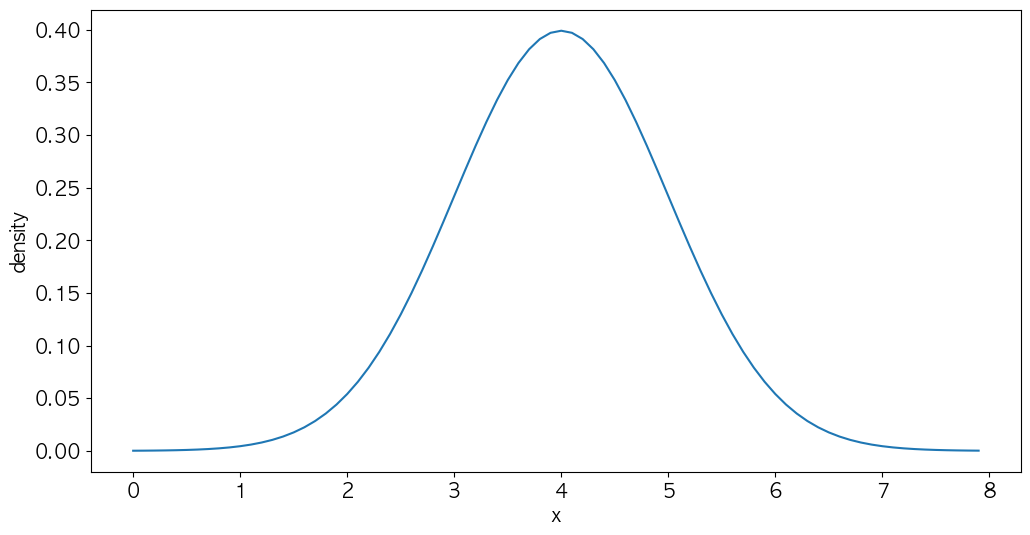

In [4]:
# 그래프로 그려본다
# 선 그래프로 그려본다.
# 정규분포를 보이는 데이터가 있다고 가정하여 구한 확률 밀도 값이다.
# 따라서 평균 부분이 확률 밀도값이 가장 높고 평균으로 부터 멀어질 수록 확률 밀도값은 낮아진다.
# 그리고 평균을 기준으로 좌우가 대칭되는 형태를 보인다 (정규분포 이기 때문에....)
# 이 그래프의 형태를 가우스 곡선이라고 부르며 종 모양 곡선이라고 부르기도 한다.
sns.lineplot(data=density_df, x='x', y='density')
plt.show()

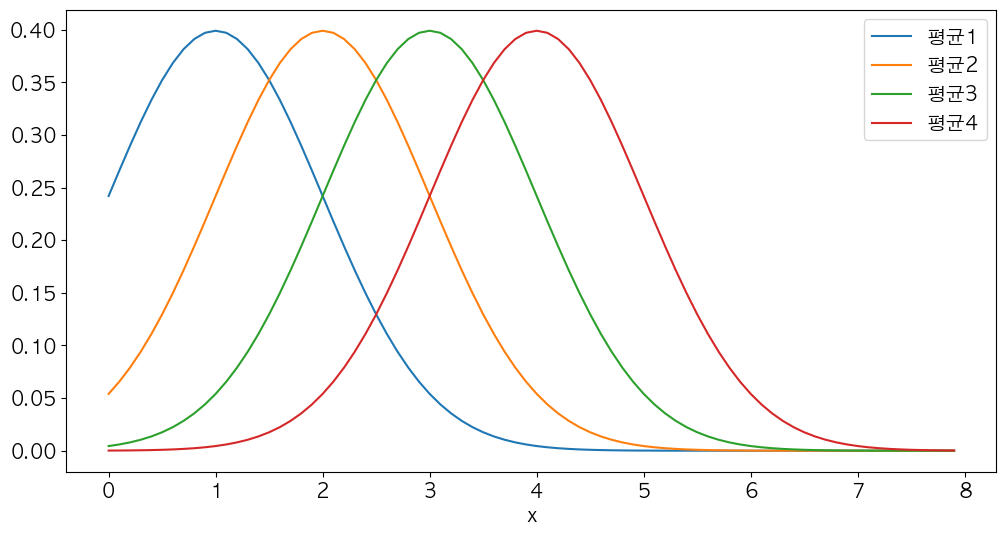

In [5]:
# 평균이 달라졌을 때...
density_1 = stats.norm.pdf(loc=1, scale=1, x=x)
density_2 = stats.norm.pdf(loc=2, scale=1, x=x)
density_3 = stats.norm.pdf(loc=3, scale=1, x=x)
density_4 = stats.norm.pdf(loc=4, scale=1, x=x)

density_df2 = pd.DataFrame({
    'x' : x,
    '평균1' : density_1,
    '평균2' : density_2,
    '평균3' : density_3,
    '평균4' : density_4,
})

density_df2.plot(x='x')
plt.show()

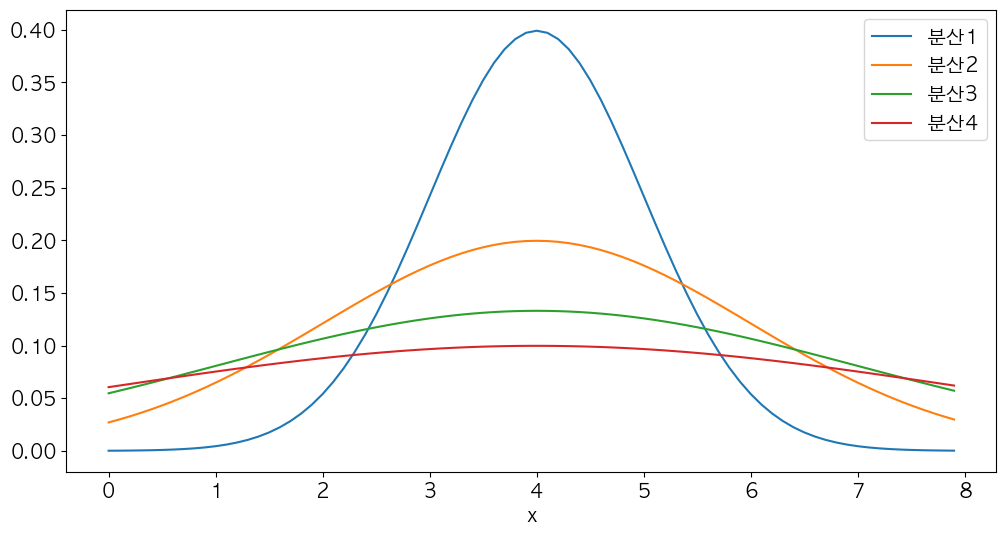

In [6]:
# 분산이 달라졌을 때...
density_1 = stats.norm.pdf(loc=4, scale=1, x=x)
density_2 = stats.norm.pdf(loc=4, scale=2, x=x)
density_3 = stats.norm.pdf(loc=4, scale=3, x=x)
density_4 = stats.norm.pdf(loc=4, scale=4, x=x)

density_df2 = pd.DataFrame({
    'x' : x,
    '분산1' : density_1,
    '분산2' : density_2,
    '분산3' : density_3,
    '분산4' : density_4,
})

density_df2.plot(x='x')
plt.show()

### 02_오차 누적 시뮬레이션

In [7]:
# 올바른 값을 4라고 가정한다.
# 4라는 수치에 작은 오차를 무작위로 1만개를 더한다.
# 오차는 -0.01 과 0.01이 0.5 확률로 선택된다고 한다.
# -0.01이 더 많이 더해지면 4보다 작아지고
# 0.01이 더 많이 더해짐녀 4보다 커지게 된다.

# 더하거나 빼지는 횟수
n_noise = 10000

# 중심위치
location = 4

# 더하거나 뺄 수
noise = np.array([-0.01, 0.01])

In [8]:
np.random.seed(5)
# 0.01이나 -0.01을 10000번 랜덤하게 추출하여 총합을 구하고
# 그 값을 원래의 값에 더해주어 오차를 발생시킨다.
location + np.sum(np.random.choice(noise, size=n_noise))

np.float64(3.52)

In [9]:
# 위의 실험을 5만번 수행한다.
# 더하거나 빼지는 횟수
n_trial = 50000

# 오차의 누적을 담을 변수
observation_result = np.zeros(n_trial)

np.random.seed(1)

# 수행횟수만큼 반복한다.
for i in range(n_trial) :
    observation_result[i] = location + np.sum(np.random.choice(noise, size=n_noise))

In [10]:
# 전체의 평균을 구한다.
x_bar = np.mean(observation_result)
# 전체의 분산을 구한다.
u2 = np.var(observation_result, ddof=0)

print(f'평균 : {x_bar}')
print(f'분산 : {u2}')

평균 : 3.9975019999999994
분산 : 1.003328407996


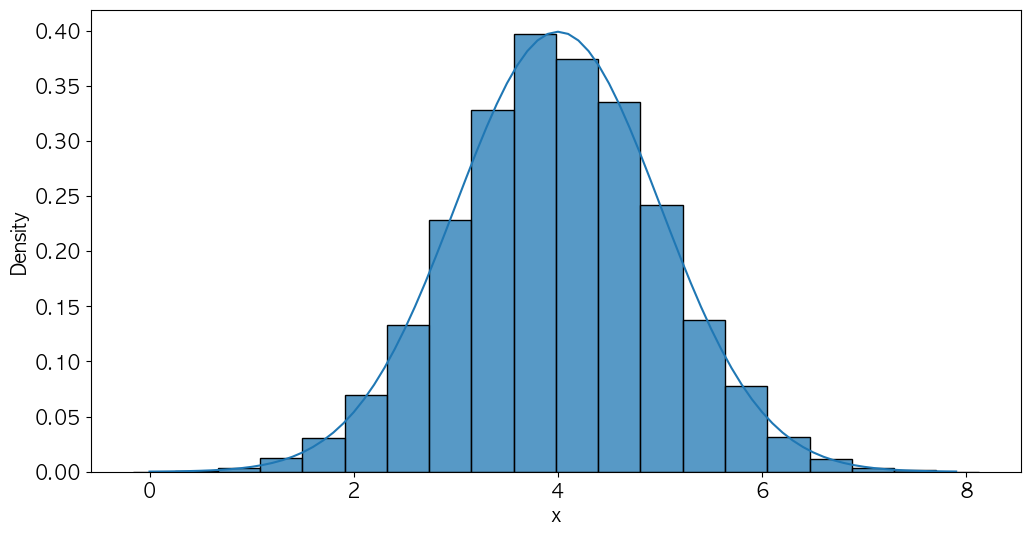

In [11]:
# 위의 결과의 확률 밀도 함수값을 히스토 그램으로 그려본다.
sns.histplot(data=observation_result, bins=20, stat="density")
# 평균4, 분산1의 정규분포의확률 밀도 함수를 그린다.
sns.lineplot(data=density_df, x='x', y='density')
plt.show()